### <a/ id='top'></a>
# Homework 3: Random Variables, and the Central Limit Theorem
***

**Name**: 

***

This assignment is due on Canvas by **5 PM on Monday March 18**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- Any relevant data sets should be available under the **Data** module on Canvas, as well as in the zipped folder in which you obtained this assignment. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- You **MUST** leave all of your notebook cells **evaluated** so the graders do not need to re-evaluate them. For 100+ students, this extra time adds up, and makes the graders' lives unnecessarily more difficult.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) 

---

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
from scipy.special import binom
import matplotlib.pylab as plt
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)

<img src="https://media.daysoftheyear.com/20171223112636/hedgehog-day1.jpg" style="width: 500px;"/>


### [25 points] Problem 1

Suppose you are modeling the probability of observing various levels of cuteness in hedgehogs you encounter.  Let $X$ be a random variable representing the observed cuteness, which is *obviously* nonnegative and has units of deci*awws*. You decide to use the following pdf for $X$:

$$
f(x) = \begin{cases}
         c \ x \ e^{\left(-\frac{x^2}{4}\right)} & 0 \leq x < \infty \\
         0                           & \text{otherwise}
       \end{cases}
$$
where $c$ is some normalizing constant.

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid probability density function. Then, make a plot of the probability density function for hedgehog cuteness, $f(x)$. Be sure to label your axes!

To determine the value of $c$ such that $f(x)$ is a valid PDF, we want: 
<br><br> 
$$ \large \int_{0}^{\infty} c \ x \ e^{\left(-\frac{x^2}{4}\right)} dx = 1$$
<br><br>
Let:
<br>
$$ \large u = -\frac{x^2}{4} $$ 
<br><br>
So:
<br>
$$ \large du = -\frac{2x}{4}dx = -\frac{x}{2}dx $$ 
<br><br>
$$ \large dx = -\frac{2}{x}du $$ 
<br><br> 
Then:
<br>
$$ \large \int_{0}^{\infty} \frac{-2c \ x \ e^{\left(u\right)}}{x} du = 1$$
<br><br>
$$ \large -2c \int_{0}^{\infty}  e^{\left(u\right)} du = 1$$
<br><br>
By exponential rule: 
<br>
$$ \large \int e^u du = e^u $$ 
<br><br>
Then: 
$$\large -2c \int  e^{\left(u\right)} du = -2c \cdot e^{\left(u\right)} + C = -2c \cdot e^{-\frac{x^2}{4}} + C$$
<br><br>
Then:
<br>
$$ \large -2c \cdot e^{-\frac{x^2}{4}} \biggr \rvert_{0}^{\infty} $$
<br><br>
$$ \large [-2c \cdot 0] - [-2c \cdot e^0] $$
<br><br>
Then:
<br>
$$ \large 2c = 1$$
<br><br>
$c = \frac{1}{2} $ such that  𝑓(𝑥)  is a valid probability density function.

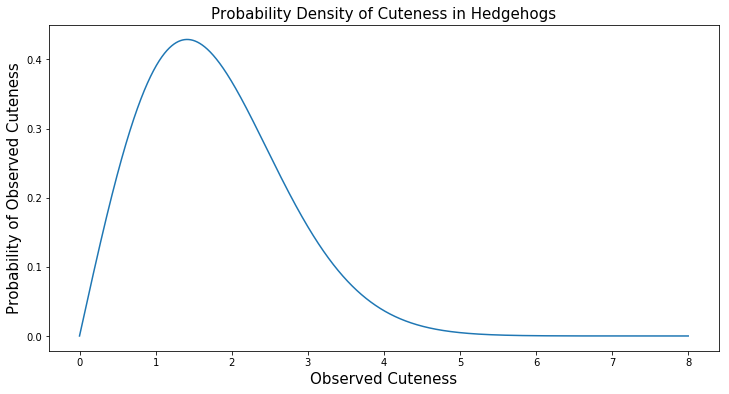

In [2]:
def f(x): 
    c = 1/2
    power = -((x**2)/4)
    return c * x * np.exp(power)

def plot(): 
    x_axis = np.arange(0.0, 8, 0.001)
    y_axis = []

    for i in x_axis:
        y_axis.append(f(i))
        
    return x_axis, y_axis

x, y = plot()
plt.figure(figsize=(12,6))
plt.xlabel("Observed Cuteness", fontsize = 15)
plt.ylabel("Probability of Observed Cuteness", fontsize = 15)
plt.title("Probability Density of Cuteness in Hedgehogs", fontsize = 15)
plt.plot(x,y)

**Part B**: Compute *by hand* the cumulative density (cdf) function $F(x)$ for $X$.

$$ \large  F(x) = \int_{0}^{x} \frac{1}{2} \ y \ e^{\left(-\frac{y^2}{4}\right)} dy $$
<br><br>
$$\large =  \frac{1}{2} \int_{0}^{x} y \ e^{\left(-\frac{y^2}{4}\right)} dy $$
<br><br>
$$ \large u = -\frac{y^2}{4}, du = [-\frac{2y}{4}dy = -\frac{y}{2}dy]$$
<br><br>
$$ \large dy = -\frac{2}{y}du $$
<br>
$$ \large \frac{1}{2} \int_{0}^{x} \frac{-2 \ y \ e^{\left(u\right)}}{y} du$$
<br><br>
$$ \large -2\cdot \frac{1}{2} \int_{0}^{x}  e^{\left(u\right)} du$$ 
<br><br>
$$ = \large -1\cdot  e^{\left(u\right)} \biggr \rvert_{0}^{x}$$ 
<br><br>
$$ = \large -e^{-\frac{y^2}{4}} \biggr \rvert_{0}^{x}$$ 
$$ = \large [-e^{-\frac{x^2}{4}}]−[−e^{0}] $$
<br><br>
$$ = \large -e^{-\frac{x^2}{4}} + 1 $$
<br><br>
$$ \large F(x) = 1-e^{-\frac{x^2}{4}}$$

**Part C:**  Use the cdf you derived in **Part B** to calculate the median ($\tilde{x}$) cuteness of all hedgehogs.

Using the CDF, the median ($\tilde{x}$) would be when x yields: 
$$\large F(x) = 1-e^{-\frac{x^2}{4}} = \frac{1}{2}$$
<br><br>
$$\large F(x) = -e^{-\frac{x^2}{4}} = -\frac{1}{2}$$
<br><br>
$$\large F(x) = e^{-\frac{x^2}{4}} = \frac{1}{2}$$
<br><br>
$$\large \ln \left(e^{-\frac{x^2}{4}}\right)=\ln \left(\frac{1}{2}\right)$$
<br><br>
$$ \large -\frac{x^2}{4}=-\ln \left(2\right)$$
<br><br>
$$\large x^2= 4\ln \left(2\right)$$
<br><br>
$$ \large x=2\sqrt{\ln \left(2\right)}$$
<br><br>
$$ \large \tilde{x} \approx 1.66511 $$
<br>
The above is the median ($\tilde{x}$) cuteness of all hedgehogs because cuteness cannot be negative.

**Part D**: It is a well-known fact that any hedgehog whose cuteness exceeds 3 deciawws is **totes adorbz**. Use the cdf you computed in **Part B** to find the probability that any arbitrary hedgehog that you observe is totes adorbz.

$$\large P(X >= 3) = 1 - F(3) $$
<br><br>
$$\large P(X >= 3) = 1-[1-e^{-\frac{3^2}{4}}] $$
<br><br>
$$\large P(X >= 3) = 1-[1-e^{-\frac{9}{4}}] $$
<br><br>
$$\large P(X >= 3) = 1-[1-\frac{1}{e^{\frac{9}{4}}}] $$
<br><br>
$$\large P(X >= 3) = 1-[1-\frac{1}{e^2e^{\frac{1}{4}}}] $$
<br><br>
$$\large P(X >= 3) = \frac{1}{e^2e^{\frac{1}{4}}}$$
<br><br>
$$\large P(X >= 3) \approx 0.10540$$

**Part E:** You have been painstakingly collecting data on hedgehogs all over town, and the cuteness is damn near overwhelming. Suppose you sample 5 hedgehogs, and the cuteness of any given hedgehog is independent of the cuteness of all other hedgehogs. What is the probability that more than half of them are totes adorbz? Keep at least 5 decimal places in your answer.

$$ \large[C(5, 3) \cdot P(X >= 3)^3 \cdot (1 - P(X >= 3))^2] + [C(5, 4) \cdot P(X >= 3)^4 \cdot (1 - P(X >= 3))] + [C(5, 5) \cdot P(X >= 3)^5 \cdot (1 - P(X >= 3))^0] $$
<br><br>
$$ \large= \left[10\cdot \left(\frac{1}{e^2e^{\frac{1}{4}}}\right)^3\cdot \left(1-\left(\frac{1}{e^2e^{\frac{1}{4}}}\right)^2\right)\right]+\left[5\cdot \left(\frac{1}{e^2e^{\frac{1}{4}}}\right)^4\cdot \left(1-\left(\frac{1}{e^2e^{\frac{1}{4}}}\right)\right)\right]+\left[1\cdot \left(\frac{1}{e^2e^{\frac{1}{4}}}\right)^5\cdot \left(1-\left(\frac{1}{e^2e^{\frac{1}{4}}}\right)\right)^0\right] $$
<br><br>
$$\large = \frac{10e^4e^{\frac{1}{2}}-15e^2e^{\frac{1}{4}}+5}{e^{\frac{45}{4}}}+\frac{1}{e^{10}e^{\frac{5}{4}}} \approx 0.00994 $$

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
### [25 points] Problem 2 - Monte Carlo Estimation of Definite Integrals

One really cool application of random variables is using them to approximate integrals/area under a curve.  This method of approximating integrals is used frequently in computational science to approximate really difficult integrals that we never want to do by hand.  In this exercise you'll figure out how we can do this in practice and test your method on a relatively simple integral. 

**Part A.**  Let $X$ be a random variable representing how delicious a pie you bake is, as measured by the **Deliciousness Index** (DI).  Suppose the probability density function for $X$ is described by the raised cosine probability density function:

$$
f(x) = \begin{cases}
         \dfrac{1}{\pi}\left(\cos{(x)} + 1\right) & 0 \leq x \leq \pi \\
         0                           & \text{otherwise}
         \end{cases}
$$

A Deliciousness Index of $\pi$ is the most delicious pie you can ever hope to create, and a DI of $0$ is the most disgusting pie you have ever tasted.  

Compute **by hand**, the integral of $f(x)$ for $0 \leq x \leq \dfrac{\pi}{2}$.  Write a sentence or two to interpret your result physically, in the context of this problem set-up.

$$\large \int_{0}^{\frac{\pi}{2}} \dfrac{1}{\pi}\left(\cos{(x)} + 1\right)dx$$
<br><br>
$$\large \int cos(x) dx = sin(x) + C$$
<br><br>
$$\large \int 1 dx = x + C$$
<br><br>
$$\large \int_{0}^{\frac{\pi}{2}} \dfrac{1}{\pi}\left(\cos{(x)} + 1\right)dx = \frac{1}{\pi}[sin(x)+x] \biggr \rvert_{0}^{\frac{\pi}{2}}$$
<br><br>
$$ \large = \frac{1}{\pi}[sin(\frac{\pi}{2}) + \frac{\pi}{2}] - [\frac{1}{\pi}[sin(0) + 0]] $$
<br><br>
$$ \large = \frac{1}{\pi}[1 + \frac{\pi}{2}] - [\frac{1}{\pi}[0]] $$
<br><br>
$$ \large = \frac{1}{\pi} + \frac{\pi}{2\pi}  = \frac{2}{2\pi \:}+\frac{\pi \:}{2\pi \:} = \frac{2+\pi }{2\pi }$$
<br><br>
$$\large \approx 0.81831 $$ 

## Write a sentence or two to interpret your result physically
This value represents the probability from a pie being in the range from the most disgusting pie you have ever tasted to as __half__ as delicious as the most delicious pie you can ever hope to create. 

**Part B.** Suppose we sample a random variable $X$ from $U(0,\frac{\pi}{2})$ and another random variable $Y$ from $U(0,1)$ and think of them as $x$- and $y$-coordinates of a point in the box $[0,\frac{\pi}{2}] \times [0,1]$.  If we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, what does this value estimate? 

If we have the box $[0,\frac{\pi}{2}] \times [0,1]$, there are numerous values that fall under the curve, over the curve, and on the curve. Thus, if we compute the ratio of points that fall under the curve $f(x)$ to the total points sampled, this value estimates: 
<br><br>
Let:
<br>
$\large UC$ = the number of points under the curve. 
<br><br>
$\large n$ = the number of points in total. 
<br><br>
Then, the value that this estimates is: 
<br><br>
$\large \frac{UC}{n}$ which is the proportion of points that fall under the curve $f(x)$.

**Part C.** How could we modify the process outlined in **Part B** so that our estimator estimates the value of the desired integral?  If you need inspiration, check out the in-class notebook on Stochastic Simulation (#4), specifically, the exercise where we estimated $\pi$!

To get the value of the desired integral of $f(x)$ from $0$ to $\pi$ would be:
<br><br>
Let:
<br>
$\large A$ = total area of the box specified in __Part B__.
<br><br>
$\large \frac{UC}{n} \cdot A$ would get us the value of the desired integral. 

**Part D.** Complete the function `integrate` below to compute an approximation to the definition integral $\int_0^{\text{ub}} f(x)dx$.  Your function should take as arguments:
1. `num_samples` -- the number of points to sample,
2. `ub` -- a number between $0$ and $\pi$ that is the upper bound of the integral, and
3. `isPlot` -- a Boolean flag for whether or not to display a plot of the results.

Your function should return an approximation of the definite integral by sampling $X$ from $U(0,\text{ub})$ and $Y$ from $U(0,1)$. For each random draw $(X,Y)$, define the random variable $Z$ that represents whether or not the sampled $Y$ value is less than $f(X)$ for the corresponding $X$ value.

Your function should perform three tasks: 

1. return the estimate of the value of the integral,
2. return the sample variance of the random variable $Z$ being simulated, using the np.var function, and
3. if `isPlot` is True, plot the curve $f(x)$ as well as the location of the points $(X,Y)$, colored according to whether they fall above or below the curve. 

In [3]:
# GIVEN CODE - Do not change the inputs/outputs or your code will fail unit tests and auto-grading!
def integrate(num_samples, ub, isPlot):
    
    x = np.random.uniform(0, ub, num_samples)
    y = np.random.uniform(0, 1, num_samples)
    
    f = 1/np.pi*(np.cos(x)+1)
    
    isUnderCurve = []
    for i in range(num_samples): 
        if y[i] < f[i]: 
            isUnderCurve.append(True)
        else:
            isUnderCurve.append(False)
    
    #UC = np.sum(isUnderCurve)
    #n = num_samples
    #A = (ub - 0) * (1 - 0) = ub
    #Estimate = UC/n * A
    estimate = ub * np.sum(isUnderCurve)/num_samples
    sample_var = np.var(isUnderCurve, ddof=1)
    
    if(isPlot):
        fig, ax = plt.subplots(figsize=(12,6))
        x_val = np.arange(0, np.pi, np.pi/100)
        ax.plot(x_val, 1/np.pi*(np.cos(x_val)+1), '--', label = "f(x)")
        ax.scatter(x[y<f],y[y<f], c ='Green',label = "(X,Y) Below Curve")
        ax.scatter(x[y>f], y[y>f], c ='Red', label = "(X,Y) Above Curve")
        ax.set_xlim([0,np.pi])
        ax.set_ylim([0,1])
        ax.set_xlabel("X Values", fontsize = 15)
        ax.set_ylabel("Y Values", fontsize = 15)
        ax.set_title("(X,Y) Points in Relation With f(x)", fontsize = 15)
        ax.legend(fontsize=15)
    
    return estimate, sample_var

**Part E.** Write your own small unit tests!

First, what should your `integrate` function output if you plug in `ub=0`? Set that as `int_0_to_0` below.

Second, what should your `integrate` function output if you plug in `ub=`$\pi$? Set that as `int_0_to_pi` below.

Then, you can execute the cell below to run two sanity checks. Write out **in math** (like, a definite integral) what each of these two tests is checking and **why** that is a reasonable sanity check.

If these two assertions run without fail, then things seem to be working okay. Note that the upper endpoint test is stochastic, so if it fails, try running it a few times. If it fails a lot, then things are probably going wrong.

In [4]:
int_0_to_0  = 0
int_0_to_pi = 1


#---------------------------------------
# DO NOT EDIT THIS CELL BELOW HERE
#---------------------------------------
assert integrate(1000, 0, False)[0]==int_0_to_0, "Error: lower endpoint test failing"
assert math.isclose(integrate(10000, np.pi, False)[0],int_0_to_pi,abs_tol=0.03), "Error: upper endpoint test failing"

# Write out in math (like, a definite integral) what each of these two tests is checking and why that is a reasonable sanity check.
$$\large \frac{1}{\pi}\int_{0}^{0}(cos(x) + 1)\ dx$$
<br><br>
$$\large = \frac{1}{\pi}(sin(x) + x)\biggr\rvert_{0}^{0}$$
<br><br>
$$\large = [\frac{1}{\pi}(0 + 0)]-[\frac{1}{\pi}(0 + 0)] = 0$$
<br>
This is a reasonable sanity check because when the lower and upper limits of an integral are the same, the integral should evaluate to 0. This is because there would be no area when the upper and lower limit is the same. This test is making sure that when I am trying to find the area from 0 to 0 (i.e. no area), the integral evaluates to 0. 
<br><br>
$$\large \frac{1}{\pi}\int_{0}^{\pi}(cos(x) + 1)\ dx$$
<br><br>
$$\large = \frac{1}{\pi}(sin(x) + x)\biggr\rvert_{0}^{\pi}$$
<br><br>
$$\large = [\frac{1}{\pi}(0 + \pi)] - 0$$
<br><br>
$$\large = \frac{1}{\pi}(\pi) = \frac{\pi}{\pi} = 1$$
<br>
This is a reasonable sanity check because it is the CDF of $f(x)$. Thus, when I am evaluating from 0 to $\pi$, the CDF should be equal to one. Thus, this test is making sure that the F(x) evaluates to 1 when we evaluate it from 0 to $\pi$.   

**Part F.** Run your simulation with `isPlot=True` and `ub=`$\frac{\pi}{2}$ for 1,000 samples so we can see your plot. Then, run your simulation (with `isPlot=False`) with at least 10,000 samples and estimate the value of the given integral. Be sure to leave your cells evaluated for the graders! Does your estimate agree with the exact value of the integral you computed in **Part A**? 

Estimate with 1000 samples is: 0.8105309046261666
Estimate with 10000 samples is: 0.8124158602183206


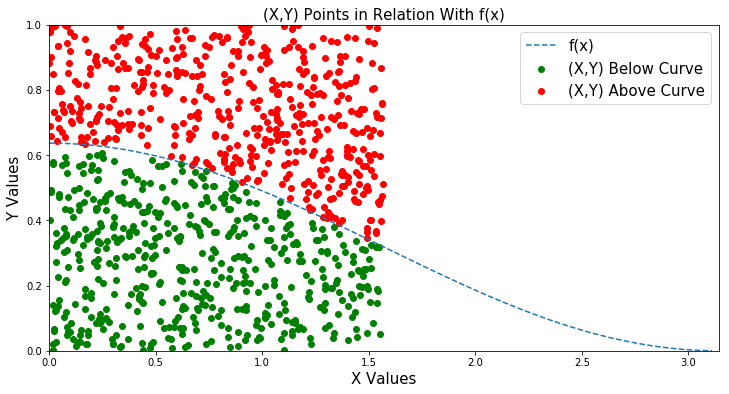

In [16]:
estTrue, varTrue = integrate(1000, np.pi/2, True)
print("Estimate with 1000 samples is: {}".format(estTrue))
estFalse, varFalse = integrate(10000, np.pi/2, False)
print("Estimate with 10000 samples is: {}".format(estFalse))

## Does your estimate agree with the exact value of the integral you computed in Part A?
The exact value of the integral I computed in __Part A__ was $\frac{2 + \pi}{2\pi} \approx 0.81831$. 
<br><br>
I get around $0.81$ from the estimate from the code above. So __yes__ the estimate agrees with the exact value of the integral I computed in Part A. 

<br>

---
<a/ id='p3'></a>
[Back to top](#top)
### [25 points] Problem 3 - Mmmm... Donuts...

<img src="http://astrokentico.s3.amazonaws.com/rojakdaily/media/1nichoras/homer%20simpson%20krispy%20kreme/main.jpg?ext=.jpg" style="width:300px;"/>

You bring many donuts (or _doughnuts_, if you're into that) to work to share with your coworkers at the Boulder Nuclear Power Planet. But due to the high levels of radiation there, they must be inspected for safety. In particular, if the mean level of radiation in a sample from your batch of donuts is above [200 mSv (millisievert)](#rad), then they are deemed unsafe and you must throw the whole batch away.

You know that historically donuts at the power plant have, on average, 190 mSv of radiation, with a standard deviation of 40 mSv. To test the donut radiation levels, you take the donut receipt and pick every fifth donut off it, and sample the radiation levels of those donuts. You end up sampling the radiation levels of 36 donuts out of the batch.

**Part A.** What is the probability that a donut batch is deemed unsafe?  You should at the very least set up and justify your calculation by hand (in Markdown/Mathjax), before executing any calculations in Python.

I want $\bar x$ using Central Limit Theorem. CLT says: 
<br><br>
$\large \bar X$ ~ $\large N(\mu, \frac{\sigma^2}{n})$ even when a population is not normally distributed. 
<br><br>
Here we have:
<br><br>
$\large \sigma = 40$
<br><br>
$\large \sigma^2 = 1600$
<br><br>
$\large n = 36$
<br><br> 
$\large \mu = 190$
<br><br>
Then:
<br>
$$\large P(Z > 200) = P(Z > \frac{200-190}{\frac{40}{\sqrt{36}}})$$
<br><br>
$$\large = P(Z > \frac{200-190}{\frac{40}{6}})$$
<br><br>
$$\large = P(Z > \frac{10\cdot 6}{40})$$
<br><br>
$$\large = P(Z > \frac{6}{4})$$
<br><br>
Then: 
$$\large 1 - \phi(1.5)$$

In [6]:
# 1 - phi(1.5)
above200 = 1-stats.norm.cdf(1.5)
print("Probability that a donut batch is deemed unsafe (when radiation is above 200 mSv): {}".format(above200))

Probability that a donut batch is deemed unsafe (when radiation is above 200 mSv): 0.06680720126885809


**Part B.** You really do not want to throw away donuts that frequently, so you propose to store the donuts in a lead-lined donut box. But lead also is not very good for your health, so you are motivated to use the least amount of lead possible. What is the minimum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.01?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

$$\large P(\bar X > 200) < 0.01$$
<br><br>
$$\large P(\bar X > 200) = P(\frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}}) > P(\frac{200 - \mu}{\frac{40}{\sqrt{36}}}) = P(Z > \frac{200 - \mu}{\frac{40}{\sqrt{36}}}) = 1 - P(Z \leq \frac{200 - \mu}{\frac{40}{\sqrt{36}}}) = 0.01$$
<br><br>
$$\large P(Z \leq \frac{200 - \mu}{\frac{40}{\sqrt{36}}}) = 0.99$$
We want:
<br><br>
$$\large Z = \frac{200 - \mu}{\frac{20}{3}}$$
<br><br>
$$\large Z = \frac{3(200-\mu)}{20}$$
<br><br>
$$\large 2.326 = \frac{3(200-\mu)}{20}$$
<br><br>
$$\large 2.326 \cdot 20 = 3(200-\mu)$$
<br><br>
$$\large \frac{2.326 \cdot 20}{3} = 200-\mu$$
<br><br>
$$\large \frac{2.326 \cdot 20}{3} - 200 = -\mu$$
<br><br>
$$\large -184.491 = -\mu$$
<br><br>
$$\large 184.491 = \mu$$

### The minimum mean amount of radiation $\mu$ for our donuts to have such that the probability that we will throw donuts out due to safety concerns is at most 0.01 is: $\mu$ = 184.491 mSv. 

In [7]:
Z = stats.norm.ppf(0.99)
print("The critical value is: {}".format(Z))

The critical value is: 2.3263478740408408


**Part C.**  Your supervisor at the plant decides that serving up donuts in a lead-lined box is a bad idea. Fair enough.

But she is still imposing the requirement that the probability of a batch of donuts being rejected must be less than 0.01. Suppose the mean and standard deviation are at their original values of $\mu = 190$ mSv and $\sigma = 40$ mSv. What is the minimum sample size to satisfy this requirement?

Calculate this **by hand**, using Python only to perform arithmetic operations and compute critical values of a standard normal random variable.

$$\large P(\bar X > 200) = 1 - P(Z \leq \frac{200-190}{\frac{40}{\sqrt{n}}}) = 0.01$$
<br><br>
$$\large Z = \frac{200 - 190}{\frac{40}{\sqrt{n}}}$$
<br><br>
$$\large 2.326 = \frac{200 - 190}{\frac{40}{\sqrt{n}}}$$
<br><br>
$$\large 2.326 = \frac{10 \cdot \sqrt{n}}{40}$$
<br><br>
$$\large 2.326 \cdot 40 =  \sqrt{n}$$
<br><br>
$$\large 9.3054^2 = n$$ 
<br><br>
$$\large 86.59046916 = n$$
<br><br>
$$\large 87 = n $$

### The minimum sample size to satisfy these requirements $\mu = 190$ mSv,  $\sigma = 40$ mSv, and probability of a batch of donuts being rejected must be less than 0.01 is: $n = 87$ because we will not have fractions of donuts. 

In [8]:
Z2 = stats.norm.ppf(0.99)
print("The critical value is: {}".format(Z2))

The critical value is: 2.3263478740408408


**Part D.** Can you think of any potential issues with using a normal distribution to model the radiation content of our donuts?

In a standard normal distribution, we have that $\mu = 0$ and $\sigma^2 = 1$. The most glaring problem is that radiation content of our donuts will never be negative. The normal distribution, however, would have values in which radiation is negative. That is why using a normal distribution is an issue. 

<br>

---
<a/ id='p4'></a>
[Back to top](#top)
### [25 points] Problem 4 - Here come the hedgehogs

**Part A:** You are conducting a study of the cuteness of hedgehogs, because you want to verify the calculations from Problem 1. You set up a data collection center, and record in your data set the time when each hedgehog arrives at your site. The data are found in `arrivals.csv`.

Load these data into a Pandas DataFrame, compute the time span between successive hedgehog arrivals, and plot a density histogram of those inter-hedgehog arrival times.

To best capture the majesty of the mighty hedgehog, your histogram boxes should be `sienna` with `khaki` edges. Your histogram should also have 50 bins, because hedgehogs love histograms with 50 bins. Hedgehogs are illiterate, so they don't really care about axis labels, but your instructor does. So, be sure to label your axes too.

Text(0.5, 1.0, 'Inter-Hedgehog Arrival Times With Density')

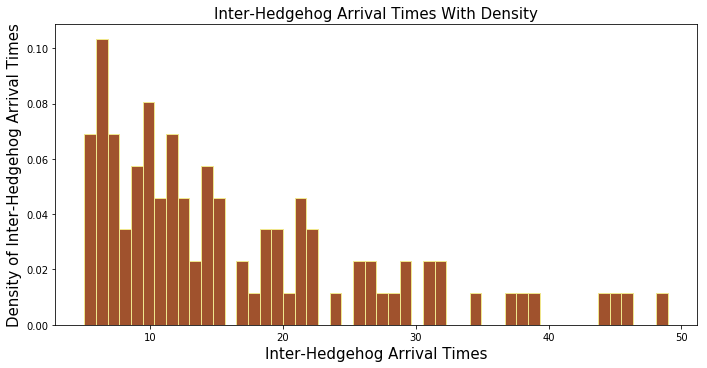

In [9]:
df = pd.read_csv("arrivals.csv")

arrivals = df['hedgehogs']

timeDiff = np.diff(arrivals)
    
plt.figure(figsize=(11.5,5.525))
plt.hist(timeDiff, facecolor ='sienna', edgecolor = 'khaki', bins=50, density = True)
plt.xlabel("Inter-Hedgehog Arrival Times", fontsize = 15)
plt.ylabel("Density of Inter-Hedgehog Arrival Times", fontsize = 15)
plt.title("Inter-Hedgehog Arrival Times With Density", fontsize = 15)

**Part B:** Compute a 99% confidence interval (to 4 decimal places) for the mean of the inter-hedgehog arrival time. If you use any theorem(s) in your calculation, be sure to state what they are and why the theorem(s) can be applied. 

In [10]:
mean = np.mean(timeDiff)
n = len(timeDiff)
SD = np.std(timeDiff)
alpha = 1 - (0.99)
Z = stats.norm.ppf(1-alpha/2)
CIpos = mean + (Z * (SD/math.sqrt(n)))
CIneg = mean - (Z * (SD/math.sqrt(n)))
print("CI = [{0:.4f}, {1:.4f}]\n".format(CIneg,CIpos))
print("My 99% confidence interval for the mean of inter-hedgehog arrival times is 13.8282 to 19.2335")

CI = [13.8282, 19.2335]

My 99% confidence interval for the mean of inter-hedgehog arrival times is 13.8282 to 19.2335


Here, we are using the Central Limit Theorem:
<br><br>
$\large \bar X \sim N(\mu, \frac{\sigma^2}{n})$
<br><br> 
This theorem can be applied because it applies to distributions that are/aren't normal distributions and thus can be used to calculate a CI. 

**Part C:** Speculate: what would happen if you hadn't included all the data in your confidence interval calculation above? Specifically, if you only observed the first 30 of your data points and used those to compute a confidence interval, would it be wider or less wide? Why? You may assume that the number of data points is the *only* thing changing in this hypothetical situation.

In [11]:
print("Mean of the data: {}".format(mean))
print("Numer of data points in data: {}".format(n))
print("Standard deviation for data: {}".format(SD))
print("Z_a/2 value for data: {}".format(Z))

Mean of the data: 16.53086604490066
Numer of data points in data: 99
Standard deviation for data: 10.43982048936942
Z_a/2 value for data: 2.5758293035489004


We would have a wider confidence interval. We can show why this is the case mathematically. 
<br><br>
We have that the General CI is:
<br><br>
$$\large \bar x \pm z_{\frac{a}{2}} \cdot \frac{\sigma}{\sqrt{n}}$$
<br><br>
Since nothing but $n$ is changing, we will have these when calculating the CI: 
<br><br>
$$\large \bar x = 16.53, z_{\frac{a}{2}} = 2.57, \sigma = 10.44$$
<br><br>
When n = 99: 
<br><br>
$$\large 16.53 + 2.57 \cdot \frac{10.44}{\sqrt{99}}$$
<br><br>
$$\large 16.53 - 2.57 \cdot \frac{10.44}{\sqrt{99}}$$
<br><br>
$$\large CI = [13.8282, 19.2335]$$
<br><br>
$\large 5.4053$ is the width. 
<br><br>
When n = 30:
<br><br>
$$\large 16.53 + 2.57 \cdot \frac{10.44}{\sqrt{30}}$$
<br><br>
$$\large 16.53 - 2.57 \cdot \frac{10.44}{\sqrt{30}}$$
<br><br>
$$\large CI = [11.6314, 21.4286]$$
<br><br>
$\large 9.7972$ is the width.
<br><br>
So: 
$$\large 9.7972 > 5.4053$$
<br><br>
Thus, we can see when $n$ is smaller, as is the case when $n = 30$, the width of confidence interval is __wider__ than when $n$ is bigger. 

**Part D:** Write a function to confirm what you have written above. For each value of $n$ between $30$ and the total number of data points, compute a 90% CI using the first $n$ inter-arrival times. Plot the CIs (vertical axis) against $n$ (horizontal axis). Plot the means as black X symbols, with vertical "errorbars" for the CIs colored `sienna`. See Matplotlib's [errorbar](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.errorbar.html) plot type. Be sure to label your axes!

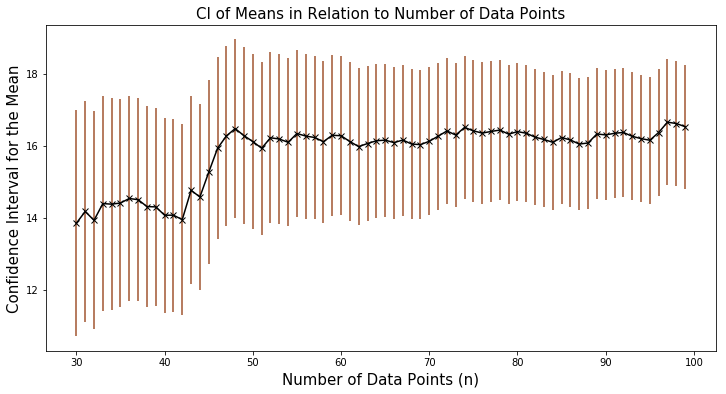

In [12]:
def plotCI():
    CIarr = []
    meanArr = []
    
    num_plots = len(timeDiff)
    standardDev = np.std(timeDiff)
    a = 1 - (0.90)
    Z_crit = stats.norm.ppf(1-a/2)
    
    for n in range(30, num_plots+1):
        CIarr.append(Z_crit * (SD/math.sqrt(n)))
        until = timeDiff[:n]
        meanArr.append(np.mean(until))
        
    plt.figure(figsize=(12,6))
    plt.errorbar(range(30, num_plots+1), meanArr, yerr=CIarr, marker = 'x', color = 'black', ecolor = 'sienna')
    plt.xlabel("Number of Data Points (n)", fontsize = 15)
    plt.ylabel("Confidence Interval for the Mean", fontsize = 15)
    plt.title("CI of Means in Relation to Number of Data Points", fontsize = 15)
plotCI()

**Part E:** Reflect on how your confidence intervals change as the sample sizes $n$ increase from 30 to about 100. Does this make sense? Write a few sentences to reflect on the behavior that you see in your plot from Part D, and why it does/does not make sense.

As $n$ increases from 30 to about 100, the CI becomes less wide. This makes sense, because in __Part C__ I showed that a smaller n will make the CI wider. Thus, it makes sense that the CI would become __less wide__ as n becomes bigger. This means that the CI is approaching the true mean. The other thing that I will comment on is the mean. The mean seems to remain the same after n is about 50. This makes sense because as we have more data points, it will become more apparent what the mean actually is. 

<br>

---
### Notes

<a/ id='rad'></a> 200 mSv is somewhere below Chernobyl levels of exposure, but more radiation than you would want with regard to potentially increasing your risk of cancer. It's probably too high, but it is a nice round number! More information [here](https://www.theguardian.com/news/datablog/2011/mar/15/radiation-exposure-levels-guide).

[Back to Problem 3](#p3)